In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
import numpy as np

from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# emotion_model = Sequential()
# emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# emotion_model.add(Dropout(0.25))
# emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# emotion_model.add(Dropout(0.25))
# emotion_model.add(Flatten())
# emotion_model.add(Dense(1024, activation='relu'))
# emotion_model.add(Dropout(0.5))


# emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(64, (3, 3), input_shape=(48,48,1)))
emotion_model.add(Activation('relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(128, (3, 3)))
emotion_model.add(Dropout(0.3))
emotion_model.add(Activation('relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(256, (3, 3)))
emotion_model.add(Activation('relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(256, (3, 3)))
emotion_model.add(Activation('relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

emotion_model.add(Dense(128))
emotion_model.add(Activation('relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(Dropout(0.25))

emotion_model.add(Dense(64))
emotion_model.add(Activation('relu'))
emotion_model.add(BatchNormalization())

emotion_model.add(Dense(7))
emotion_model.add(Activation('softmax'))

# emotion_model.compile(loss='categorical_crossentropy',
#             optimizer='adam',
#             metrics=['accuracy'])

In [ ]:
import datetime
%reload_ext tensorboard
import tensorflow as tf
import keras

emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001, decay=1e-6),metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=7178 // 64,
        callbacks=[tensorboard_callback])

Epoch 1/100
448/448 [==============================] - 25s 50ms/step - loss: 1.6593 - accuracy: 0.3677 - val_loss: 2.0729 - val_accuracy: 0.2344
Epoch 2/100
448/448 [==============================] - 21s 47ms/step - loss: 1.3110 - accuracy: 0.4979 - val_loss: 1.4456 - val_accuracy: 0.4467
Epoch 3/100
448/448 [==============================] - 21s 47ms/step - loss: 1.1892 - accuracy: 0.5491 - val_loss: 1.4365 - val_accuracy: 0.4519
Epoch 4/100
448/448 [==============================] - 21s 48ms/step - loss: 1.0910 - accuracy: 0.5896 - val_loss: 1.2069 - val_accuracy: 0.5435
Epoch 5/100
448/448 [==============================] - 19s 41ms/step - loss: 1.0073 - accuracy: 0.6198 - val_loss: 1.3404 - val_accuracy: 0.4955
Epoch 6/100
448/448 [==============================] - 19s 42ms/step - loss: 0.9262 - accuracy: 0.6556 - val_loss: 1.2120 - val_accuracy: 0.5378
Epoch 7/100
448/448 [==============================] - 19s 41ms/step - loss: 0.8308 - accuracy: 0.6939 - val_loss: 1.3284 - val_ac

In [ ]:
#Saving the model
emotion_model.save('model_cnn_100_epoch.h5')

In [ ]:
from keras.models import load_model
emotion_model = load_model('/content/model_cnn_100_epoch.h5')

In [ ]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'neutral' , 'sad' , 'surprise' )
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [ ]:
# #CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

# from IPython.display import display, Javascript
# !pip install google.colab.output
# from google.colab.output import eval_js
# from base64 import b64decode

# def take_photo(filename='photo.jpg', quality=0.8):
#   js = Javascript('''
#     async function takePhoto(quality) {
#       const div = document.createElement('div');
#       const capture = document.createElement('button');
#       capture.textContent = 'Capture';
#       div.appendChild(capture);

#       const video = document.createElement('video');
#       video.style.display = 'block';
#       const stream = await navigator.mediaDevices.getUserMedia({video: true});

#       document.body.appendChild(div);
#       div.appendChild(video);
#       video.srcObject = stream;
#       await video.play();

#       // Resize the output to fit the video element.
#       google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

#       // Wait for Capture to be clicked.
#       await new Promise((resolve) => capture.onclick = resolve);

#       const canvas = document.createElement('canvas');
#       canvas.width = video.videoWidth;
#       canvas.height = video.videoHeight;
#       canvas.getContext('2d').drawImage(video, 0, 0);
#       stream.getVideoTracks()[0].stop();
#       div.remove();
#       return canvas.toDataURL('image/jpeg', quality);
#     }
#     ''')
#   display(js)
#   data = eval_js('takePhoto({})'.format(quality))
#   binary = b64decode(data.split(',')[1])
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return filename

In [ ]:
# %matplotlib inline

# import cv2
# import matplotlib.pyplot as plt
# from IPython import display



# vc = cv2.VideoCapture(0)

# if vc.isOpened(): # try to get the first frame
#     is_capturing, frame = vc.read()
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
#     webcam_preview = plt.imshow(frame)    
# else:
#     is_capturing = False

# while is_capturing:
#     try:    # Lookout for a keyboardInterrupt to stop the script
#         is_capturing, frame = vc.read()
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
#         webcam_preview.set_data(frame)
#         plt.draw()

#         display.clear_output(wait=True)
#         display.display(plt.gcf())

#         plt.pause(0.1)    # the pause time is = 1 / framerate
#     except KeyboardInterrupt:
#         vc.release()

In [ ]:
# take_photo()

In [ ]:
# import cv2

a='D:\emotion recogniton\image5.jpg'
            
def facecrop(image):  
    facedata = 'D:\emotion recogniton\front_face_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite(a, sub_face)
            print ("Writing: " + image)

    except Exception as e:
        print (e)

   


if __name__ == '__main__':
    facecrop(a)



'NoneType' object has no attribute 'shape'


In [ ]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = "D:\emotion_recognition\PrivateTest_88305.jpg"

true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48])


plt.imshow(true_image)
plt.show()

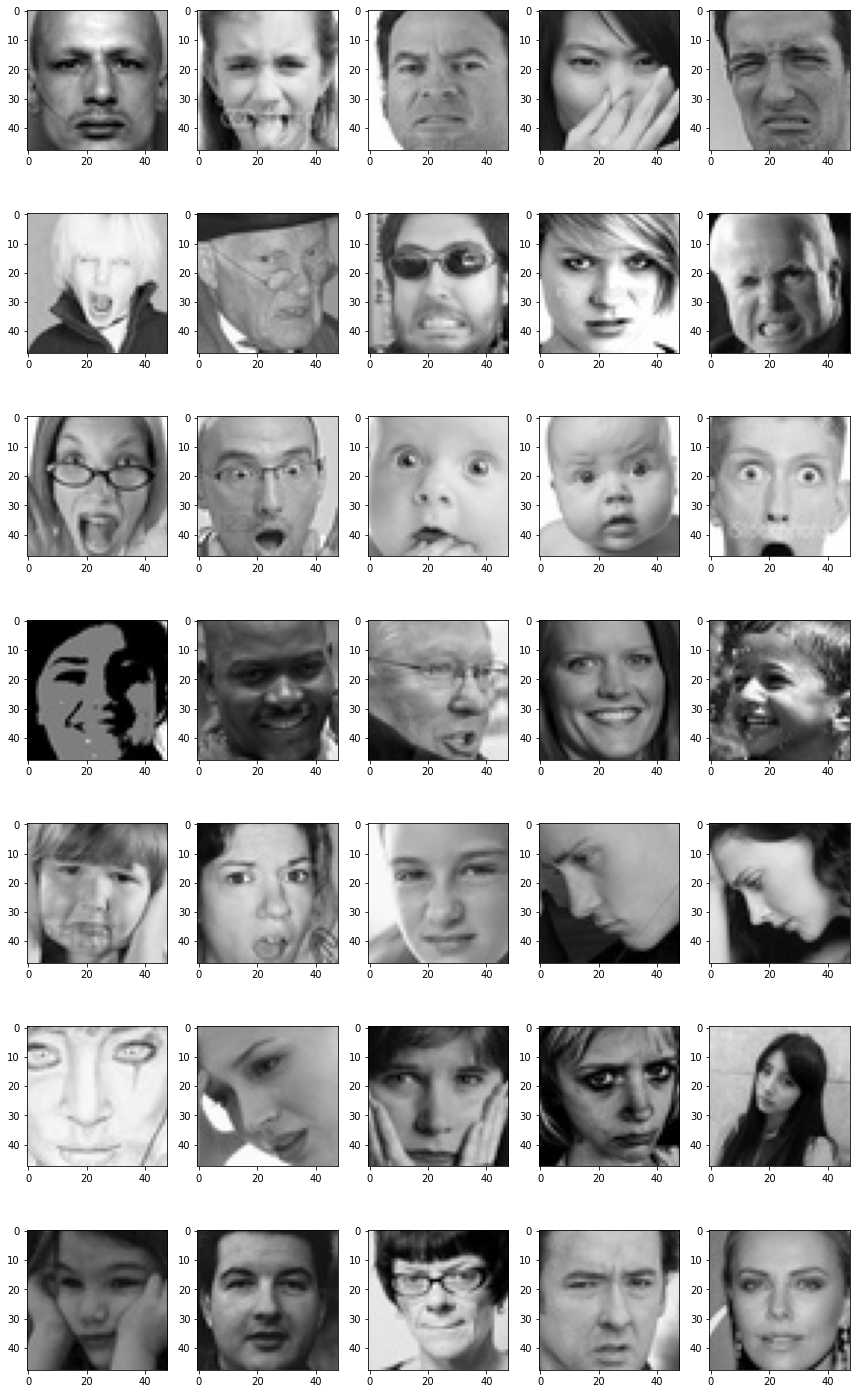

In [ ]:
#testing the dataset


from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def plot_example_images(plt):
    img_size = 48
    plt.figure(0, figsize=(12,20))
    ctr = 0

    for expression in os.listdir("test/"):
        for i in range(1,6):
            ctr += 1
            plt.subplot(7,5,ctr)
            img = load_img("test/" + expression + "/" +os.listdir("test/" + expression)[i], target_size=(img_size, img_size))
            plt.imshow(img, cmap="gray")

    plt.tight_layout()
    return plt

plot_example_images(plt).show()


In [ ]:

import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
emotion_model = load_model('/content/model_cnn_100_epoch.h5')



# def emotion_analysis(emotions):
#     objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
#     return
#     y_pos = np.arange(len(objects))
    # plt.bar(y_pos, emotions, align='center', alpha=0.5)
    # plt.xticks(y_pos, objects)
    # plt.ylabel('percentage')
    # plt.title('emotion')
    # plt.show()



        
# file ='D:\emotion_recognition\image3.jpg'
# true_image = image.load_img('D:\emotion_recognition\image3.jpg')
# img = image.load_img(file, color_mode="grayscale", target_size=(48,48))

# x = image.img_to_array(img)
# x = np.expand_dims(x, axis = 0)

# x /= 255

# custom = emotion_model.predict(x)
# emotion_analysis(custom[0])

# x = np.array(x, 'float32')
# x = x.reshape([48, 48])


# plt.imshow(img)
# plt.show()





objects = {0:'angry', 1:'disgust', 2:'fear', 3:'happy',4:'neutral', 5:'sad', 6:'surprise'}
img_size=48
true_con=0
false_con=0
for expression in os.listdir("test/"):
    for i in range(0,100):
        img = load_img("test/" + expression + "/" +os.listdir("test/" + expression)[i], color_mode="grayscale", target_size=(img_size, img_size),grayscale='True')
        # plt.imshow(img)
        # img.show()
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        x = np.array(x, 'float32')
        # x = x.reshape([48, 48])
        
        x /= 255
        custom=emotion_model.predict(x)
        custom=custom.tolist() #converting to list
        # max_one=max(custom[0])
        emotion=objects[custom[0].index(max(custom[0]))]
        if emotion==expression:
            # print("True")
            true_con+=1
        else:
            # print("False")
            false_con+=1
print(true_con)
print(false_con)


377
323


In [ ]:
%load_ext tensorboard
import tensorflow as tf
import datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 9404), started 0:02:00 ago. (Use '!kill 9404' to kill it.)

<IPython.core.display.Javascript object>